# Projects 23 : Noisy Nerds | Reliable Surrogate Models of Noisy Data |

Description:

## 1. Botorch implementation

In [6]:
import torch
import pandas as pd
from run_grid_experiments import run_grid_experiments

### 1a) Select data generation parameters

In [7]:
seeds = list(range(5))
n_inits = [2, 4, 8, 10]
noise_levels = [1, 5, 10, 20]
noise_bools = [True, False]
budget = 30

### 1b) Training gp

In [10]:
#run_grid_experiments(seeds, n_inits, noise_levels, noise_bools, budget) -------> module not found error: unable to resolve using sys.path.append
# run run_grid_botorch.py --> populates results in results_botorch/

### 1c) Analysing results

In [12]:
import seaborn as sn
import numpy as np
import torch
import pandas as pd

from src import visualization
import matplotlib.pyplot as plt

In [15]:
seeds = list(range(5))
n_inits = [2, 4, 8, 10]
noise_levels = [1, 5, 10, 20]
noise_bools = [True, False]
n_inits = n_inits[::-1]
budget = 30
iteration_cutoff = 20

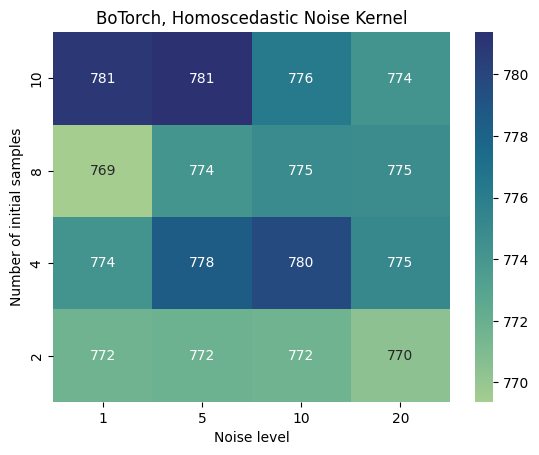

In [16]:

sm_list = {}
performance_matrix_homo = np.zeros((len(n_inits), len(noise_levels)))

noise_bool = True
for i, n_init in enumerate(n_inits):
    for j, noise_level in enumerate(noise_levels):
        
        sm_agg = torch.zeros((len(seeds), n_init+budget))
        for idx, seed in enumerate(seeds):
            X, Y, Y_real, model = torch.load(f"results_botorch/Schwe_n_init_{n_init}_noiselvl_{noise_level}_budget_{budget}_seed_{seed}_noise_{noise_bool}.pt")
            sliding_min = torch.zeros(Y.shape[0])
            for ii in range(Y_real.shape[0]):
                sliding_min[ii] = Y_real[:ii+1].min().item()
            
            sm_agg[idx] = sliding_min
            sm = pd.Series(sliding_min.numpy())
            
            
        sm_mean = sm_agg.mean(0)[:iteration_cutoff]
        sm_std = sm_agg.std(0)
        sm_list[(n_init, noise_level, noise_bool)] = (sm_mean, sm_std)
        performance_matrix_homo[i,j] = sm_mean.min()
fig, ax = plt.subplots()
visualization.grid_search_heatmap(n_inits, noise_levels, performance_matrix_homo)
plt.title(f'BoTorch, Homoscedastic Noise Kernel')
plt.savefig(f'BoTorch_heatmap{noise_bool}.png', dpi=300)

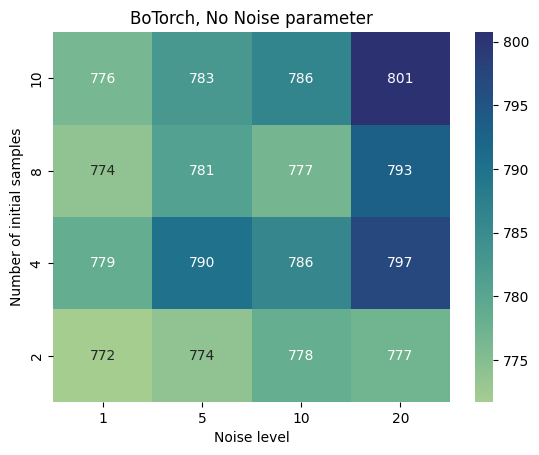

In [18]:

sm_list = {}
performance_matrix_zn = np.zeros((len(n_inits), len(noise_levels)))

noise_bool = False
for i, n_init in enumerate(n_inits):
    for j, noise_level in enumerate(noise_levels):
        
        sm_agg = torch.zeros((len(seeds), n_init+budget))
        for idx, seed in enumerate(seeds):
            X, Y, Y_real, model = torch.load(f"results_botorch/Schwe_n_init_{n_init}_noiselvl_{noise_level}_budget_{budget}_seed_{seed}_noise_{noise_bool}.pt")
            sliding_min = torch.zeros(Y.shape[0])
            for ii in range(Y_real.shape[0]):
                sliding_min[ii] = Y_real[:ii+1].min().item()
            
            sm_agg[idx] = sliding_min
            sm = pd.Series(sliding_min.numpy())
            
            
        sm_mean = sm_agg.mean(0)[:iteration_cutoff]
        sm_std = sm_agg.std(0)
        sm_list[(n_init, noise_level, noise_bool)] = (sm_mean, sm_std)
        performance_matrix_zn[i,j] = sm_mean.min()
fig, ax = plt.subplots()
visualization.grid_search_heatmap(n_inits, noise_levels, performance_matrix_zn)
plt.title(f'BoTorch, No Noise parameter')
plt.savefig(f'BoTorch_heatmap{noise_bool}.png', dpi=300)

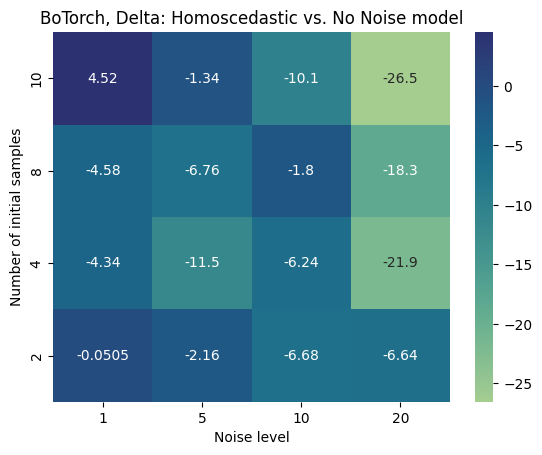

In [19]:
delta_performance = performance_matrix_homo - performance_matrix_zn

fig, ax = plt.subplots()
visualization.grid_search_heatmap(n_inits, noise_levels, delta_performance)
plt.title(f'BoTorch, Delta: Homoscedastic vs. No Noise model')
plt.savefig(f'BoTorch_heatmap_delta.png', dpi=300)

## 

## 2. Baybe implementation

In [ ]:
import torch
import pandas as pd
from run_grid_experiments_baybe import run_grid_experiments
import run_experiment_baybe


### 1a) Select data generation parameters

In [ ]:
seeds = list(range(5))
n_inits = [2, 4, 8, 10]
noise_levels = [1, 5, 10, 20]
noise_bools = [True, False]
budget = 30

### 1b) Training gp

In [ ]:
run_grid_experiments(seeds, n_inits, noise_levels, noise_bools, budget)

### 1c) analysing results

In [ ]:
import seaborn as sn
import numpy as np
import torch
import pandas as pd

from src import visualization
import matplotlib.pyplot as plt

In [ ]:
n_inits = [2, 4, 8, 10]
noise_levels = [1, 5, 10, 20]

n_inits = n_inits[::-1]

In [ ]:
performance_matrix = np.zeros((len(n_inits), len(noise_levels)))

for i, init in enumerate(n_inits):
    for j, noise in enumerate(noise_levels):
        y_vals = torch.load(f'results/Schwe_n_init_{init}_noiselvl_{noise}_budget_30_seed_0_noise_True.pt')[1]
        best_y = torch.min(y_vals)
        performance_matrix[i,j] = best_y
        
        
        

## combined final conclusion